# Two Sample Z-Test

Two-sample tests are appropriate for comparing two samples, typically experimental and control samples from a scientifically controlled experiment.

https://en.wikipedia.org/wiki/Test_statistic

Two-sample z-test	

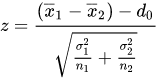

Normal population and independent observations and σ1 and σ2 are known

In [4]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power
from statsmodels.stats import weightstats
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

		b. Two Sample
			i. Two sample z test
				1) Related to mean
				2) Conditions for z-test 
					a) Random samples 
					b) Each observation should be independent of other
						i) Sampling with replacement
						ii) If sampling without replacement, the sample size should not be more than 10% of the population
					c) Sampling distribution approximates Normal Distribution
						i) Population is Normally distributed and the population standard deviation is known *** OR ***
						ii) Sample size 30


In [2]:
# Two sample Z-Test or One sample Z-test is not part of scipy library
# We need to use statsmodels to compute this
# We can compare the data with t-test using scipy library, this will be the same since the sample size is large

#### Problem 1:

Example: From two machines 100 samples each were drawn.
Is there difference in these two machines. Check at 95% confidence level.


In [8]:
df_two_machine = pd.read_csv('data/Two Machines.csv')
df_two_machine

,Volume,Machine
0,154.27,Machine 1
1,150.03,Machine 1
2,151.14,Machine 1
3,145.47,Machine 1
4,149.71,Machine 1
...,...,...
195,152.05,Machine 2
196,151.41,Machine 2
197,153.76,Machine 2
198,150.75,Machine 2


In [11]:
df_two_machine['Machine'].value_counts()

Machine 1    100
Machine 2    100
Name: Machine, dtype: int64

In [12]:
df_two_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Volume   200 non-null    float64
 1   Machine  200 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


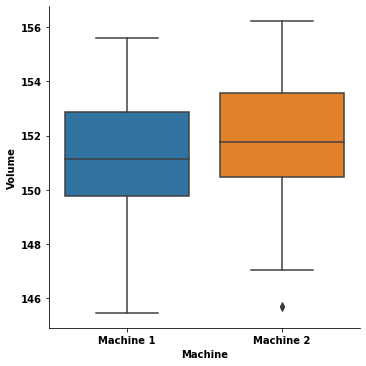

In [13]:
sns.catplot(data=df_two_machine, x='Machine', y='Volume', kind='box')

In [16]:
m1 = df_two_machine[df_two_machine['Machine'] == 'Machine 1']['Volume']
m2 = df_two_machine[df_two_machine['Machine'] == 'Machine 2']['Volume']


In [18]:
z_stat, p_value = weightstats.ztest(x1=m1, x2=m2)

In [19]:
print(f"""
The Z-Statistic is: {z_stat}
The p-value is: {p_value} \n"""  )

if p_value<0.05:
    print(f"Ho is rejected in favour of Ha")
else:
    print("Failed to reject Ho")


The Z-Statistic is: -2.189406040190184
The p-value is: 0.028567341032618248 

Ho is rejected in favour of Ha


In [22]:
# Computing the two sample t-statistic
t_stat, p_value = stats.ttest_ind(a=m1, b=m2, equal_var=True)

In [23]:
print(f"""
The Z-Statistic is: {t_stat}
The p-value is: {p_value} \n"""  )

if p_value<0.05:
    print(f"Ho is rejected in favour of Ha")
else:
    print("Failed to reject Ho")


The Z-Statistic is: -2.189406040190184
The p-value is: 0.029736299645472124 

Ho is rejected in favour of Ha


#### Problem 2:
Checking the tips data

Is there are difference of tips given by Male or Female

Is there a difference of tips in the Dinner vs Lunch

In [25]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [26]:
df_tips = sns.load_dataset(name='tips')
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [27]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


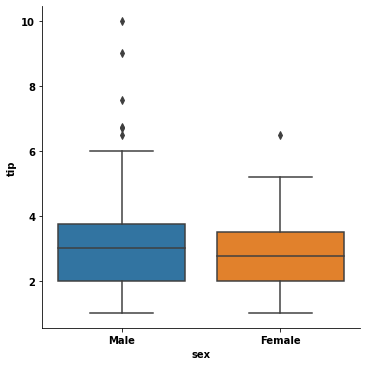

In [28]:
sns.catplot(data=df_tips, x='sex', y='tip', kind='box')

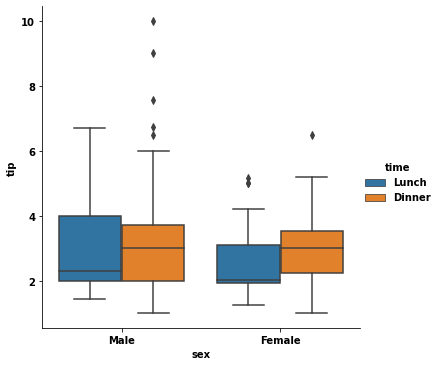

In [29]:
sns.catplot(data=df_tips, x='sex', y='tip', hue='time', kind='box')

In [32]:
tip_male = df_tips[df_tips['sex']=='Male']['tip']
tip_female = df_tips[df_tips['sex']=='Female']['tip']

In [34]:
z_stat, p_value = weightstats.ztest(x1=tip_male, x2=tip_female, alternative='two-sided')

In [35]:
print(f"""
The Z-Statistic is: {z_stat}
The p-value is: {p_value} \n"""  )

if p_value<0.05:
    print(f"Ho is rejected in favour of Ha")
else:
    print("Failed to reject Ho")


The Z-Statistic is: 1.3878597054212687
The p-value is: 0.1651797698624794 

Failed to reject Ho


In [38]:
t_stat, p_value = stats.ttest_ind(a=tip_male, b=tip_female, alternative='two-sided', equal_var=True)

In [39]:
print(f"""
The Z-Statistic is: {t_stat}
The p-value is: {p_value} \n"""  )

if p_value<0.05:
    print(f"Ho is rejected in favour of Ha")
else:
    print("Failed to reject Ho")


The Z-Statistic is: 1.3878597054212687
The p-value is: 0.16645623503456763 

Failed to reject Ho
